<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/imagenet_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# USAGE
# python imagenet_pretrained.py --image example_images/example_01.jpg --model vgg16

# import the necessary packages
from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications import InceptionV3
#from tensorflow.keras.applications import Xception
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import cv2


In [24]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input


Network = ResNet50
model = Network(weights="imagenet")



102967424/102967424 [==============================] - 1s 0us/step


In [25]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [33]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
image = load_img("/content/jemma.png", target_size=inputShape)
image = img_to_array(image)



[INFO] loading and pre-processing image...


In [34]:
image.shape

(224, 224, 3)

In [35]:
import matplotlib.pyplot as plt



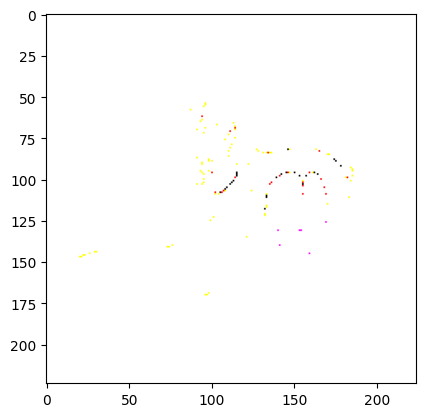

In [36]:
plt.imshow(image)

In [37]:
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(image, axis=0)

# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)



In [38]:
# classify the image
#print("[INFO] classifying image with '{}'...".format(args["model"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)



1/1 [==============================] - 0s 201ms/step


In [39]:
P

[[('n02088364', 'beagle', 0.5223104),
  ('n02088238', 'basset', 0.12359267),
  ('n02101388', 'Brittany_spaniel', 0.08713661),
  ('n02089867', 'Walker_hound', 0.06358505),
  ('n02102040', 'English_springer', 0.05648941)]]

In [ ]:
#